# Homework 1

## Part 1 - Warmup: Naive Bayes

## Spam detector for SMS messages

We will use Naive Bayes method to calssify SMS messages as spam or ham (i.e., non-spam).


In [1]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection', 
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

In [2]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 2. Data Preprocessing

### Exercise:
Do the following:
1. Change the labels of ham into 0 and spam into 1
2. Convert all messages to lower case
3. Find the distribution of messages. Namely, how many spam and how many ham SMS messages there are. What is their percetage of total messages?

In [3]:
# Part 1 - change ham to 0 and spam to 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df) 

# Part 2:  Convert to lower case
df['message'] = df['message'].str.lower()

# Part 3 - number of SMS messages of each type
message_distribution = df['label'].value_counts() # ham (0) - 4875 , spam (1) -747
ham_count = message_distribution[0]
spam_count = message_distribution[1]

# Calculate the percentages
total_messages = len(df) # 5572
ham_percentage = (ham_count / total_messages) * 100 #86.59368269921033
print(ham_percentage)
spam_percentage = (spam_count / total_messages) * 100 #13.406317300789663
print(spam_percentage)

      label                                            message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0               Will ü b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]
86.59368269921033
13.406317300789663


In [4]:
# part 4 - provided free of charge. 
# removing punctuation

df['message'] = df['message'].str.strip()
#df['message'] = df.message.str.replace('[^\w\s]', '')  # option 2
df.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


### 3. Data preprocessing using nltk package

nltk - natural language toolkit package is a package that processes text. We will use it to separate words and use their counts.

But first, let's see how this works:

In [5]:
import nltk
nltk.download('punkt')# - in case stuff is missing/not working

# break sentence into tokens (words)
sentence = 'At eight o\'clock on Thursday morning Arthur didn\'t feel very good '
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good']

In [6]:
# Remove tenses and conjugations of words
from nltk.stem import PorterStemmer

ps = PorterStemmer()   # this is a particular algoirthm


example_words = ["python","pythoner","pythoning","pythoned", "pythoned", "pythonly", "pythonant"]
for w in example_words:
    print(ps.stem(w))    
    

python
python
python
python
python
pythonli
python


In [7]:
text = "It is important to be very pythonly while you are pythoning with python. \
            All pythoners have pythoned poorly at least once."

words = nltk.word_tokenize(text)
new_text = []
for w in words:
    #print(ps.stem(w))
    new_text.append(ps.stem(w))
    
print (' '.join(new_text))

it is import to be veri pythonli while you are python with python . all python have python poorli at least onc .


### Back to SMS messages

Separating messages into words - tokenizing

In [8]:
df2 = df.copy()
df2['message'] = df2['message'].apply(nltk.word_tokenize)  

# NOTE: using df2, because otherwise you can't run this twice. 
# word_tokenize takes as argument a string, and after this is done,
# the contents of df['message'] is a list

In [9]:
df2.head()

,label,message
0,0,"[go, until, jurong, point, ,, crazy, .., avail..."
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [10]:
df2['message'] = df2['message'].apply(lambda x: [ps.stem(y) for y in x])
df2.head()

,label,message
0,0,"[go, until, jurong, point, ,, crazi, .., avail..."
1,0,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,1,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,0,"[u, dun, say, so, earli, hor, ..., u, c, alrea..."
4,0,"[nah, i, do, n't, think, he, goe, to, usf, ,, ..."


### 4.  Data Preprocessing using sklearn

#### Counting words - example first

Convert a collection of text documents to a matrix of token counts

In [11]:
from sklearn.feature_extraction.text import CountVectorizer # convert a collection of text documents into a matrix of token counts (number of occurrences of each word (token))
text_collection = ['This is the first document.',
                   'This document is the second document.',
                   'And this is the third one.',
                   'Is this the first document?']

vectorizer = CountVectorizer() # creating an instance of the CountVectorizer class. 


X = vectorizer.fit_transform(text_collection) #fit_transform() method  to convert the text_collection into a matrix of token counts. vocabulary dictionary of all tokens in documents, aka: features

print (X)  # (0, 8)	1  in the first document (index 0-row), the word with the index 8 (which corresponds to the word 'this' in the vocabulary/corpus, index 1-column) appears once (1) (metrix value)       

print(vectorizer.get_feature_names_out())   # ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

print ()

print ()
print(X.toarray())  #prints the matrix representation as a NumPy array.
#Each row of the array represents a document, and each column represents a unique word (token) in the vocabulary dictionary. The values in the array represent the counts of each word in each document.

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [13]:
import numpy as np

# my addiotion!!! how to extract the word shown with the value 2 in the metrix above: 
# Get the indices where the values are equal to 2
X_array = X.toarray()

# Get the indices where the values are equal to 2
indices = np.argwhere(X_array == 2) #[[1 1]]

# Retrieve the corresponding words using the feature names from CountVectorizer
word = [vectorizer.get_feature_names_out()[index[1]] for index in indices] # indices is numpy.ndarray thus running a for loop, and index is a list thus the subsetting

print("Word presented with the value 2 in the matrix:")
print(word)

Word presented with the value 2 in the matrix:
['document']


#### Word count per message on df2

In [14]:
# This converts the list of words into space-separated strings - so we're back to a phrase for each message 
df3 = df2.copy()
df3['message'] = df3['message'].apply(lambda x: ' '.join(x))
df3.head()

,label,message
0,0,"go until jurong point , crazi .. avail onli in..."
1,0,ok lar ... joke wif u oni ...
2,1,free entri in 2 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor ... u c alreadi then sa...
4,0,"nah i do n't think he goe to usf , he live aro..."


In [15]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df3['message'])
print(counts)

  (0, 3119)	1
  (0, 6909)	1
  (0, 3809)	1
  (0, 5161)	1
  (0, 2091)	1
  (0, 1247)	1
  (0, 4832)	1
  (0, 3578)	1
  (0, 1640)	1
  (0, 3197)	1
  (0, 7299)	1
  (0, 3920)	1
  (0, 1638)	1
  (0, 1879)	1
  (0, 6573)	1
  (0, 3159)	1
  (0, 1053)	1
  (0, 7110)	1
  (1, 4803)	1
  (1, 3952)	1
  (1, 3775)	1
  (1, 7218)	1
  (1, 4830)	1
  (2, 3578)	1
  (2, 2950)	1
  :	:
  (5570, 3686)	1
  (5570, 7146)	1
  (5570, 1066)	1
  (5570, 4034)	1
  (5570, 6070)	1
  (5570, 2908)	1
  (5570, 6554)	1
  (5570, 1366)	1
  (5570, 4644)	1
  (5570, 2312)	1
  (5570, 6940)	1
  (5570, 1663)	1
  (5570, 6079)	1
  (5570, 1667)	1
  (5570, 2568)	1
  (5570, 3046)	1
  (5570, 3241)	1
  (5570, 3642)	1
  (5570, 907)	1
  (5570, 1463)	1
  (5571, 6667)	1
  (5571, 3686)	2
  (5571, 4563)	1
  (5571, 6781)	1
  (5571, 5617)	1


In [16]:
print (count_vect.get_feature_names_out())
print(count_vect.get_feature_names_out()[3119])
print(len(count_vect.get_feature_names_out()))

['00' '000' '000pe' ... 'èn' 'ú1' '〨ud']
go
7454


 Observe that first index runs until 5571, because there 5572 messages

In [17]:
print(counts.toarray())  # this is a very sparse matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
print (counts.shape) # (5572, 7454) 5572 messeges (texts) and 7454 words in total 
print (counts[0,7191]) # meaning in the first text, the word with the index 7191 in the bag of words, isn't shown at all in the first text.

print (counts) 

(5572, 7454)
0
  (0, 3119)	1
  (0, 6909)	1
  (0, 3809)	1
  (0, 5161)	1
  (0, 2091)	1
  (0, 1247)	1
  (0, 4832)	1
  (0, 3578)	1
  (0, 1640)	1
  (0, 3197)	1
  (0, 7299)	1
  (0, 3920)	1
  (0, 1638)	1
  (0, 1879)	1
  (0, 6573)	1
  (0, 3159)	1
  (0, 1053)	1
  (0, 7110)	1
  (1, 4803)	1
  (1, 3952)	1
  (1, 3775)	1
  (1, 7218)	1
  (1, 4830)	1
  (2, 3578)	1
  (2, 2950)	1
  :	:
  (5570, 3686)	1
  (5570, 7146)	1
  (5570, 1066)	1
  (5570, 4034)	1
  (5570, 6070)	1
  (5570, 2908)	1
  (5570, 6554)	1
  (5570, 1366)	1
  (5570, 4644)	1
  (5570, 2312)	1
  (5570, 6940)	1
  (5570, 1663)	1
  (5570, 6079)	1
  (5570, 1667)	1
  (5570, 2568)	1
  (5570, 3046)	1
  (5570, 3241)	1
  (5570, 3642)	1
  (5570, 907)	1
  (5570, 1463)	1
  (5571, 6667)	1
  (5571, 3686)	2
  (5571, 4563)	1
  (5571, 6781)	1
  (5571, 5617)	1


## 5. Training the model

In [19]:
from sklearn.model_selection import train_test_split

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.1, random_state=120) #coutns is the metrix data (each row is an instance, each column is fearute (Word)),df['label'] is the target variable

print (X_train.shape)   # each row has 7454 features (all possible words) 
print (y_train.shape)   
print (X_test.shape)
print (y_test.shape)
y_test_array = y_test.values #.toarray() won't work here so we'd use this
print(y_test_array)



(5014, 7454)
(5014,)
(558, 7454)
(558,)
[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Initialize a Naive Bayes Classifier and fit the data. For text classification problems, the Multinomial Naive Bayes Classifier is well-suited. Make sure you read the documentation and understand how to use this model and why it fits our problem.

In [20]:
from sklearn.naive_bayes import MultinomialNB #imports the MultinomialNB class from the sklearn.naive_bayes module.

model = MultinomialNB().fit(X_train, y_train) #training the naive bayes classifier 


## 6. Evaluating the Model


In [21]:
import numpy as np

y_test_pred = model.predict(X_test) #This line uses the trained Naive Bayes classifier (model) to make predictions on the features of the test set (X_test)
print(y_test_pred)
# print(y_test_pred.shape) #(558,) there are 558 instances (texts) in the test set thus 558 rows, and 1 column- ham/spam


print('Model accuracy on test set: %.1f%%' % (100*np.mean(y_test_pred == y_test_array))) #comparing the predicted labels (y_test_pred) with the true labels (y_test),which results in a boolean array where True is treated as 1 and False as 0.

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 

In [22]:
#find the text indexes that were classified incorrectly,
error_indices = np.where(y_test_array != y_test_pred)[0] #error_indices = np.where(y_test_array != y_test_pred)[0] and the second index is data type, thus we used [0]
 
print("Indexes of incorrectly classified instances:", incorrect_indexes)

print()
print()

#display the messages that were classified incorrectly
incorrectly_classified_messages = df.iloc[error_indices]['message'] #iloc stands for "integer location", and it allows you to select rows and columns by their integer position.
#Once the rows corresponding to the error indices are selected ['message'] this part further selects the 'message' column from those rows.
print(incorrectly_classified_messages)



NameError: name 'incorrect_indexes' is not defined

# Exercise:

1. Print the confusion matrix
2. What are the precision and recall and F1 scores?
3. Plot ROC, and calculate AUC
4. What is your conclusion?

In [23]:
from sklearn.metrics import confusion_matrix
#1. Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)



[[461   7]
 [  2  88]]


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
#2. What are the precision and recall and F1 scores?
precision = precision_score(y_test, y_test_pred) #true_positives / (true_positives + false_positives)  the ratio of correctly predicted positive observations to the total predicted positive observations. It measures the accuracy of positive predictions.
recall = recall_score(y_test, y_test_pred) # true_positives / (true_positives + false_negatives) also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to the all observations in the actual class
f1 = f1_score(y_test, y_test_pred) # 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9263157894736842
Recall: 0.9777777777777777
F1 Score: 0.9513513513513514


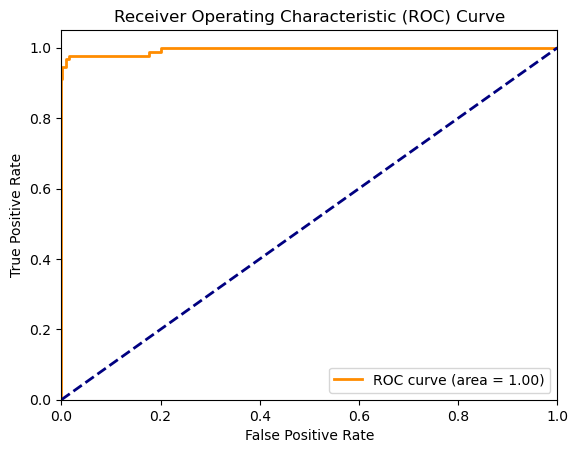

AUC: 0.9953703703703703


In [25]:
import matplotlib.pyplot as plt #to plot the ROC curve
from sklearn.metrics import roc_curve, auc 

# first step we'll rank by probabity to be True (spam) each instance in the test set 

y_test_prob = model.predict_proba(X_test)[:, 1] # returns the predicted probabilities of each class for each instance (each row) in the test set X_test.
#Column 0: Probability of the instance belonging to the negative class (ham).
#Column 1: Probability of the instance belonging to the positive class (spam).
#The first row [1.69820012e-11, 1.00000000e+00] indicates that the model predicts with very high confidence (probability close to 1) that this instance is spam.
#[:, 1] is used to choose the column contains the probabilities of the positive class (spam)
#print(y_test_prob.shape) # (558,) 558 instances and 1 column representing the probability to spam (to be True)


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob) # roc_curve returns 3 arrays 
# print(thresholds.shape) #(27,0) thus there will be 27 points of fpr and tpr 

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc) # almost 1 amazing :)



# 4. What is your conclusion?
given that the auc is almost 1 meaning our model is almost perfect in predicting wheter a text is spam or ham. in detail, the real positive (spam) texts in reality were ranked by the model with the highest probability to be a spam text (thus the tpr is rapidly gets close to 1), and on the other hand, the false positve rate remains 0 (until we make the threshold too much permissive ) meaning that there were classified very liitle amount of false positive instances . all in all, our model did very well in giving the real true instances hige probability to be true (Spam), and thus very high threshold and not premissive was required to 'catch' the TP instances. 


# Part 2 - Gaussian BN

We use Gaussian NB to classify the Iris data base. Specifically:

1. Load the iris database using load_iris from sklearn.datasets
2. split the data into train and test so that test size is half the data. Use random state=0
3. Use a Gaussian NB classifier to classify the test data
4. How many incorrect clasisfications do you get?
5. Print the parameters of the model

In [26]:
#1. Load the iris database using load_iris from sklearn.datasets
#2. split the data into train and test so that test size is half the data. Use random state=0

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB



# Load the Iris dataset
iris = load_iris() #(150,5) 

X = iris.data  # Features (150, 4)- thus 4 featues
y = iris.target  # Target variable (150,) the values are 0,1,2 meaning hree classes: 0, 1, and 2, representing the three different species of iris flowers

# Splitting the dataset into half training and half testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [27]:
#3. Use a Gaussian NB classifier to classify the test data

# Training Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predicting on the test set
y_pred = gnb.predict(X_test)


In [28]:
#4. How many incorrect clasisfications do you get?


incorrect_classifications = (y_pred != y_test).sum() #(y_pred != y_test) will create an array of False and True, thus each True meaning != is 1, so 4 mistakes...
print("Number of incorrect classifications:", incorrect_classifications)

Number of incorrect classifications: 4


In [29]:
#5. Print the parameters of the model

#naive Bayes assumes a Gaussian (normal) distribution for each feature within each class, :Mean (μ): This parameter represents the mean of the feature values for a particular class. Standard deviation (σ): This parameter represents the standard deviation of the feature values for a particular class



# Compute variances for each feature
variances = X_train.var(axis=0) #The variance parameters (variances) represent the variance of each feature across the entire dataset, regardless of class

print("Variance parameters:")
print(variances)  # Print variance parameters (4,) To represent it as a row vector with shape (1, 4), we should use reshape(1, -1)

print("\nMean parameters:")
print(gnb.theta_)  #(3,4) the mean parameters (gnb.theta_) represent the mean of each feature within each class. So, it's a 2-dimensional array where each row corresponds to a class and each column corresponds to a feature.





Variance parameters:
[0.83819733 0.17475556 3.639904   0.679776  ]

Mean parameters:
[[4.97586207 3.35862069 1.44827586 0.23448276]
 [5.935      2.71       4.185      1.3       ]
 [6.77692308 3.09230769 5.73461538 2.10769231]]


# Part 3 - Gaussian Naive Bayes Implementation

1. Implement Gaussian NB for the data below. This means: calculate prior probabilities and conditional pdfs 
2. Compare test results to those obtained by sklearn Gaussian NB
3. Explain why the second to last (9th) test sample has label 1 and not 0

 In Gaussian Naive Bayes (GNB), the conditional probability distributions are assumed to follow a Gaussian (normal) distribution, which is a continuous probability distribution. Therefore, instead of directly counting occurrences of feature values as in discrete Naive Bayes, GNB models the conditional probabilities using probability density functions (PDFs), which describe the likelihood of observing a continuous variable given a specific class.

In [30]:
# Data
import numpy as np
X_train = np.asarray([25.2, 19.3, 18.5, 21.7, 20.1, 24.3, 22.8, 23.1, 19.8,   
                      27.3, 30.1, 17.4, 29.5, 15.1]).reshape(-1,1)   # makes it (14,1) instead of (14,), .reshape(1,-1) would do it (1,14)
                     
y_train = np.asarray([0,0,0,0,0,0,0,0,0,1,1,1,1,1]) #(14,)

X_test = np.asarray([17.1, 21.8, 18.1, 31.7, 39.2, 20.4, 27.1, 30.2, 7.1, 25.4]).reshape(-1,1) #(10, 1)
y_test = np.asarray([  0,   0,    0,    1,    1,    0,    1,     1,    1,   0])   # (10, )     
print(y_test)

[0 0 0 1 1 0 1 1 1 0]


In [31]:
from scipy.stats import norm
#1. Implement Gaussian NB for the data below. This means: calculate prior probabilities and conditional pdfs (Probability Density Function)

# Step 1: Calculate prior probabilities
total_samples = len(y_train) #14
class_counts = np.bincount(y_train) # [9 5]- 9 for class 0 5 for class 1
prior_probabilities = class_counts / total_samples
print(f'priors:',prior_probabilities) 

# Step 2: Calculate conditional probability - we'd use PDF Probability Density Function. becuase the conditional probabilities in Gaussian Naive Bayes (GNB) are not discrete but continuous
#PDFs are required in GNB because it deals with continuous feature values and aims to model the distribution of these values within each class in order to calculate the posterior probabilities and make predictions effectively


#Calculate conditional probability densities manually
class_0_indices = (y_train == 0) # boolean array of True and False
class_1_indices = (y_train == 1)# boolean array of True and False

class_0_mean = np.mean(X_train[class_0_indices]) # subsetting only the elemtns with the index of True
class_0_std = np.std(X_train[class_0_indices])

class_1_mean = np.mean(X_train[class_1_indices])
class_1_std = np.std(X_train[class_1_indices])

print()

# PDFs for class 0 and class 1
pdf_class_0 = norm.pdf(X_test, class_0_mean, class_0_std) # contains the probability density values for each data point in X_test under the assumption that it belongs to class 0,
print(f'conditional probability densities for each data point under class 0', pdf_class_0)
print()

pdf_class_1 = norm.pdf(X_test, class_1_mean, class_1_std) # same but belongs to class 1.
print(f'conditional probability densities for each data point under class 1',pdf_class_1)
#so the output of pdf_class_0/1 will be an array containing the probability density values calculated for each instance in X_test, assuming a Gaussian distribution with parameters class_0/1_mean and class_0/1_std
#Each element in the array represents the probability density of the corresponding instance in X_test belonging to class 0/1.

print()
# Calculate posterior probabilities
posterior_prob_class_0 = pdf_class_0 * prior_probabilities[0]
print(f'posterior probabilities of class 0 for each data point',posterior_prob_class_0)
print()
posterior_prob_class_1 = pdf_class_1 * prior_probabilities[1]
print(f'posterior probabilities of class 1 for each data point ',posterior_prob_class_1)



priors: [0.64285714 0.35714286]

conditional probability densities for each data point under class 0 [[2.20851912e-02]
 [1.79330270e-01]
 [5.02075675e-02]
 [6.25509981e-06]
 [4.62583396e-15]
 [1.53615627e-01]
 [8.75708802e-03]
 [1.06458377e-04]
 [8.45527793e-11]
 [4.29354565e-02]]

conditional probability densities for each data point under class 1 [[0.03552207]
 [0.05961849]
 [0.04152666]
 [0.02941026]
 [0.0033983 ]
 [0.05411833]
 [0.0553034 ]
 [0.03828608]
 [0.00189744]
 [0.06113194]]

posterior probabilities of class 0 for each data point [[1.41976229e-02]
 [1.15283745e-01]
 [3.22762934e-02]
 [4.02113559e-06]
 [2.97375040e-15]
 [9.87529031e-02]
 [5.62955658e-03]
 [6.84375281e-05]
 [5.43553582e-11]
 [2.76013649e-02]]

posterior probabilities of class 1 for each data point  [[0.01268645]
 [0.02129232]
 [0.01483095]
 [0.01050366]
 [0.00121368]
 [0.01932798]
 [0.01975122]
 [0.0136736 ]
 [0.00067766]
 [0.02183283]]


In [32]:
#2. Compare test results to those obtained by sklearn Gaussian NB

#manual calculation:
y_test_pred_manual = (posterior_prob_class_1 > posterior_prob_class_0).astype(int) #It results in a boolean array +astype(int) converting the boolean values to integers 1-T 0-F

# Instantiate and fit Gaussian Naive Bayes model using sklearn
gnb_sklearn = GaussianNB()
gnb_sklearn.fit(X_train, y_train)

# Predictions using sklearn Gaussian NB
y_test_pred_sklearn = gnb_sklearn.predict(X_test)

# Compare predictions
print("Predictions using sklearn GaussianNB:", y_test_pred_sklearn)
print("Predictions using manual calculation:", y_test_pred_manual)

Predictions using sklearn GaussianNB: [0 0 0 1 1 0 1 1 1 0]
Predictions using manual calculation: [[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]


# 3. Explain why the second to last (9th) test sample has label 1 and not 0
Given that the posterior probability of class 1 for the 9th test sample is higher than that of class 0, the GNB classifier predicts the label for the 9th test sample as 1.